In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt

In [205]:
import pymorphy2

In [2]:
df = pd.read_csv('wp.csv', delimiter='|')
df['Content'] = df['Content'].str.replace(r'<.*?>', ' ')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [3]:
df.to_excel('for_klass123.xlsx')

In [4]:
df['Content'] = df['Content'].str.replace(r'\n',' ')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [5]:
#df['Рубрики'] = df['Рубрики'].str.extract(r'([А-Яа-яёЁ]+)')

In [6]:
df['Content'] = df['Content'].str.replace(r'[^A-Za-zА-Яа-я\s]',' ')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
df['Content'] = df['Content'].str.replace(r'\s+',' ')  

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [8]:
df.to_excel('for_klass.xlsx')

In [9]:
df2 = df[['Content', 'Рубрики']]

In [10]:
df2

,Content,Рубрики
0,Мы живем в эпоху ускоряющегося технического п...,Саморазвитие
1,Кредитные организации готовятся к переходу на...,Саморазвитие>Мнение эксперта
2,В году Майкл Гудвин в своей книге Экономикс п...,Саморазвитие
3,Северо Западное территориальное отделение СРО...,Саморазвитие
4,Разомнем мозг А вот и задача Поставить мат за...,Саморазвитие
...,...,...
2416,В конце г мы приняли участие в соревновании K...,Machine Learning>Нейронные сети
2417,Взаимодействие программ по сети осуществляетс...,Программирование>Java
2418,Существует несколько способов преобразовать к...,Machine Learning>Sklearn
2419,Всевозможные советы лайфхаки хитрости или даж...,Программирование>Python


In [11]:
df2.dropna(inplace = True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df2.drop(df2[df2['Рубрики'] == ''].index, inplace = True)

C:\Users\safronova-me\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
df2.drop(df2[df2['Content'] == ' '].index, inplace = True)

In [14]:
df2.to_excel('fwcwe.xlsx')

In [15]:
df2['Class'] = 0

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df2['Class'][df2['Рубрики'].str.contains('Machine')] =1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\safronova-me\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [17]:
df2

,Content,Рубрики,Class
0,Мы живем в эпоху ускоряющегося технического п...,Саморазвитие,0
1,Кредитные организации готовятся к переходу на...,Саморазвитие>Мнение эксперта,0
2,В году Майкл Гудвин в своей книге Экономикс п...,Саморазвитие,0
3,Северо Западное территориальное отделение СРО...,Саморазвитие,0
4,Разомнем мозг А вот и задача Поставить мат за...,Саморазвитие,0
...,...,...,...
2416,В конце г мы приняли участие в соревновании K...,Machine Learning>Нейронные сети,1
2417,Взаимодействие программ по сети осуществляетс...,Программирование>Java,0
2418,Существует несколько способов преобразовать к...,Machine Learning>Sklearn,1
2419,Всевозможные советы лайфхаки хитрости или даж...,Программирование>Python,0


In [18]:
df2.to_excel('bvrsebvgre.xlsx')

In [19]:
main_df = df2[['Content', 'Class']]

In [20]:
main_df

,Content,Class
0,Мы живем в эпоху ускоряющегося технического п...,0
1,Кредитные организации готовятся к переходу на...,0
2,В году Майкл Гудвин в своей книге Экономикс п...,0
3,Северо Западное территориальное отделение СРО...,0
4,Разомнем мозг А вот и задача Поставить мат за...,0
...,...,...
2416,В конце г мы приняли участие в соревновании K...,1
2417,Взаимодействие программ по сети осуществляетс...,0
2418,Существует несколько способов преобразовать к...,1
2419,Всевозможные советы лайфхаки хитрости или даж...,0


In [193]:
x_train, x_test, y_train, y_test = train_test_split(main_df['Content'], main_df['Class'], test_size = 0.33, random_state=42)

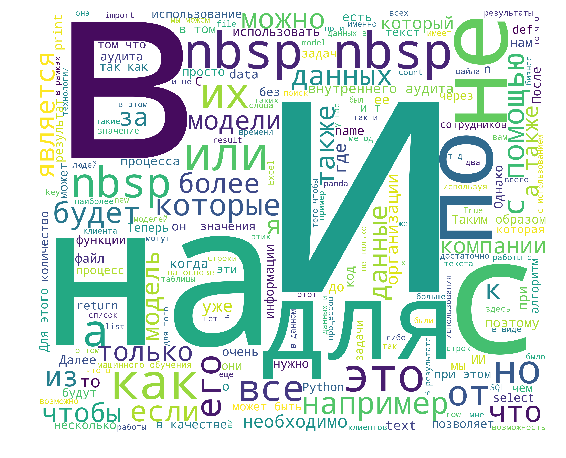

In [194]:
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

corpus = get_corpus(x_train.values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [195]:
import nltk
#nltk.download("stopwords")
nltk.data.path.append(r"C:\Users\safronova-me\nltk_data")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

x_train = x_train.map(lambda x: x.lower())
#habrParse_df['Post_clean'] = habrParse_df['Post_clean'].map(lambda x: remove_punct(x))

In [196]:
x_train = x_train.map(lambda x: x.split(' '))

In [197]:
x_train = x_train.map(lambda x: [token for token in x if token not in russian_stopwords\
                                                                  and token != " " \
                                                                  and token.strip() not in punctuation])

In [198]:
x_train = x_train.map(lambda x: ' '.join(x))

In [206]:
x_train.info

AttributeError: 'Series' object has no attribute 'info'

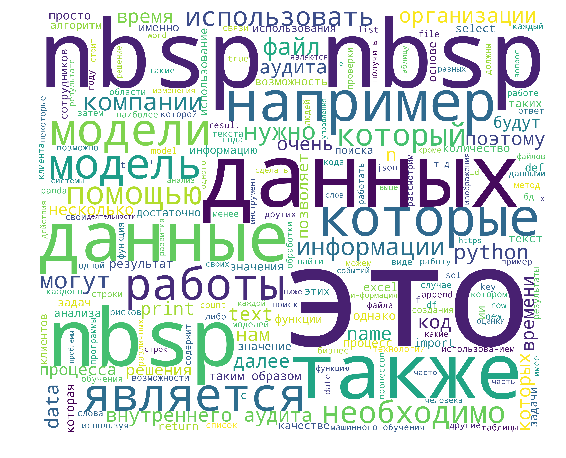

In [200]:
corpus = get_corpus(x_train.values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [201]:
x_train

2335    цвет отражает какое либо решение результат кра...
133     важность правильного анализа данных аудитора с...
2419    всевозможные советы лайфхаки хитрости обычная ...
1857    немного теории tf idf применяется анализа знач...
2322    ноябре года американская компания adobe разраб...
                              ...                        
106     недавно журнале the cpa journal опубликована п...
271     периодически средствах массовой информации мус...
2333    графовая аналитика вошла перечень трендов года...
994     сбор обработка биометрических параметров регул...
102     мозг это загадка самое сложное вселенной котор...
Name: Content, Length: 584, dtype: object

In [202]:
new = ('которые', 'также', 'далее', 'это','например','использовать','компании','является','nbsp', 'необходимо', 'несколько', 'очень', 'нужно', 'который', 'поэтому', 'могут')
for i in new:
    russian_stopwords.append(i)

In [203]:
stopwords.words

<bound method WordListCorpusReader.words of <WordListCorpusReader in 'C:\\Users\\safronova-me\\nltk_data\\corpora\\stopwords.zip/stopwords/'>>

In [204]:
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на